# Digit Recognizer

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style="dark", rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.color_palette("Paired"))

In [45]:
# Plots images
def plot_images(images, cols = 1, labels = None):
    n_images = len(images)
    if labels is None: labels = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure(figsize=(16, n_images))
    for n, (image, label) in enumerate(zip(images, labels)):
        axes = fig.add_subplot(np.ceil(n_images/float(cols)), cols, n + 1)
        plt.axis('off')
        if image.ndim == 2 or image.shape[2] == 1:
            plt.gray()
        plt.imshow(image)
        axes.set_title(label)
    plt.show()

In [46]:
data = pd.read_csv('dataset/train.csv') # This data will be split into train, test, valid
submission_test = pd.read_csv('dataset/test.csv') # submission_test is the dataset we are using for the submission
Xtrain, Xtest = train_test_split(Xtrain, test_size=0.2)
Xtrain, Xvalid = train_test_split(Xtrain, test_size=0.2)

Ytrain = Xtrain.pop('label')
Ytest = Xtest.pop('label')
Yvalid = Xvalid.pop('label')

In [34]:
Xtrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7811,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21981,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18884,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18491,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18008,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
Ytrain.head()

31814    1
20381    7
27494    4
12995    8
24133    7
Name: label, dtype: int64

In [35]:
Xtest.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24434,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30933,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17422,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25086,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
Ytest.head()

9928     6
30564    9
24681    3
17534    9
10717    1
Name: label, dtype: int64

In [36]:
Xvalid.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19800,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7001,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4139,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23857,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2250,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Yvalid.head()

1188     9
16749    8
3624     1
10272    9
27920    3
Name: label, dtype: int64

In [37]:
num_train = len(Xtrain)
num_test = len(Xtest)
num_valid = len(Xvalid)
total_examples = num_train + num_test + num_valid
print("There are " + str(num_train) + " training examples")
print("There are " + str(num_test) + " test examples")
print("There are " + str(num_valid) + " validation examples")
print(str(num_train/total_examples*100) + "% of the total data set is train.")
print(str(num_test/total_examples*100) + "% of the total dat set is test.")
print(str(num_valid/total_examples*100) + "% of the total dat set is valid.")

There are 21504 training examples
There are 6720 test examples
There are 5376 validation examples
64.0% of the total data set is train.
20.0% of the total dat set is test.
16.0% of the total dat set is valid.


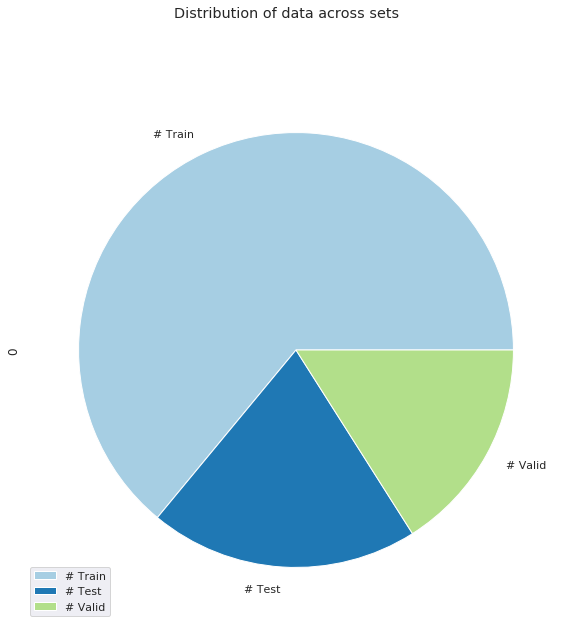

In [104]:
all_data = pd.DataFrame([num_train, num_test, num_valid],index=['# Train', '# Test', '# Valid'])
all_data.plot.pie(subplots=True, figsize=(10, 10), title="Distribution of data across sets")
plt.show()

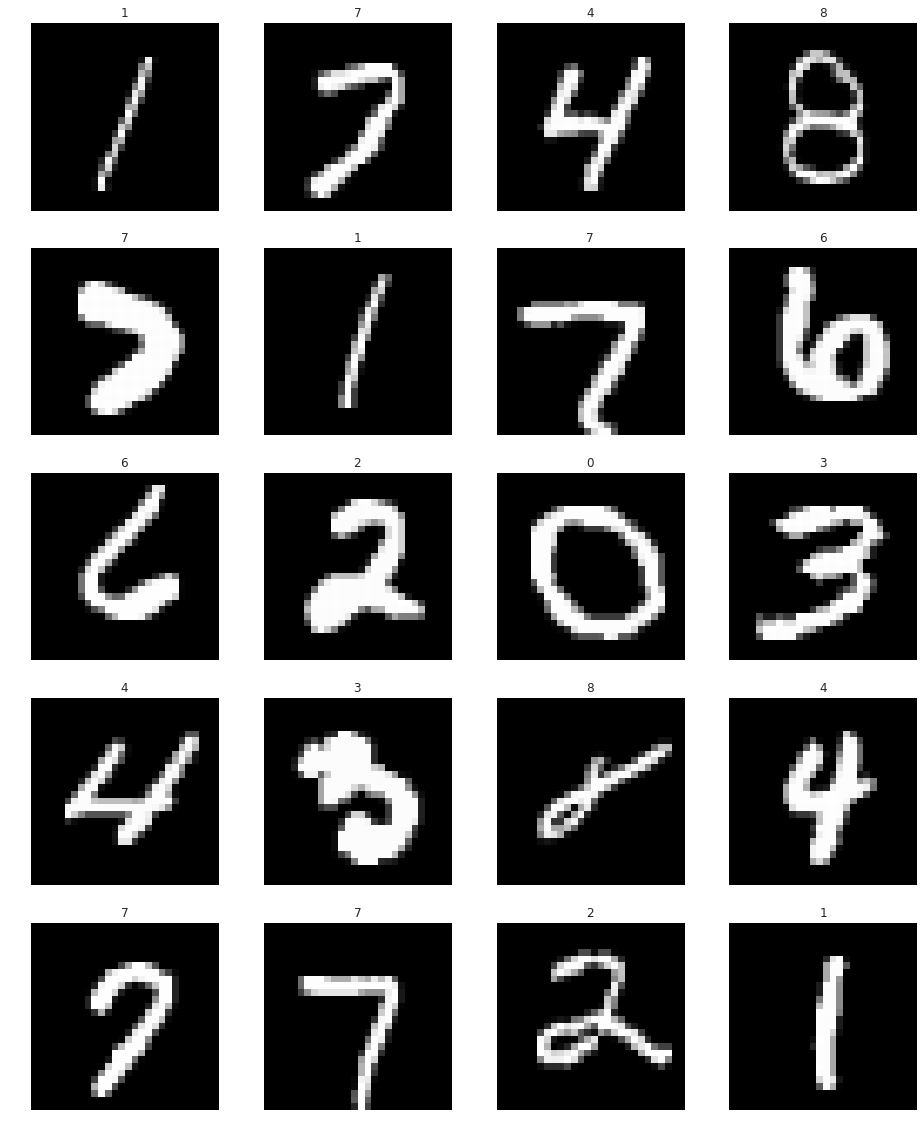

In [93]:
plot_images(Xtrain.head(20).values.reshape((-1, 28, 28)), cols=4, labels=Ytrain.head(20).values)

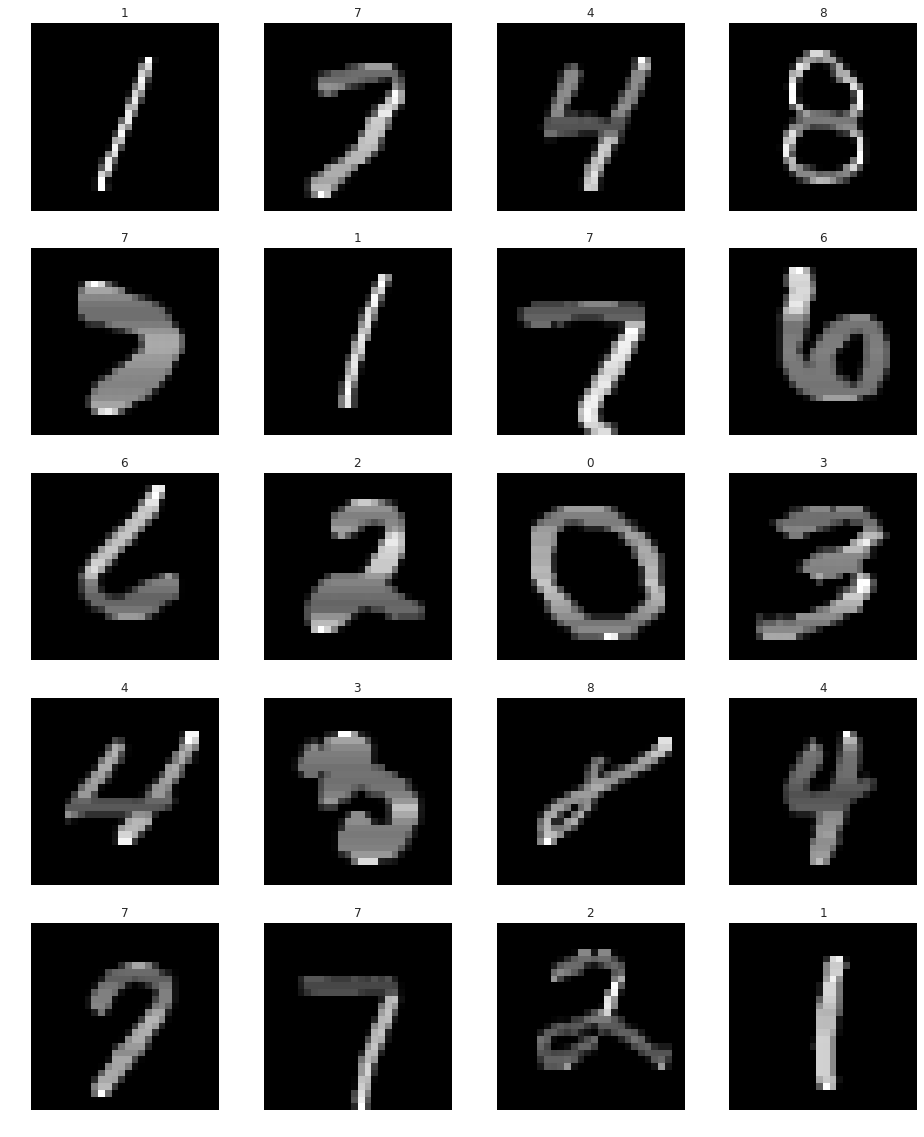

In [94]:
normalized_Xtrain_sample = tf.keras.utils.normalize(Xtrain.head(20).values)
plot_images(standardized_Xtrain_sample.reshape(-1, 28, 28), cols=4, labels=Ytrain.head(20).values)

In [95]:
pd.DataFrame(normalized_Xtrain_sample).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


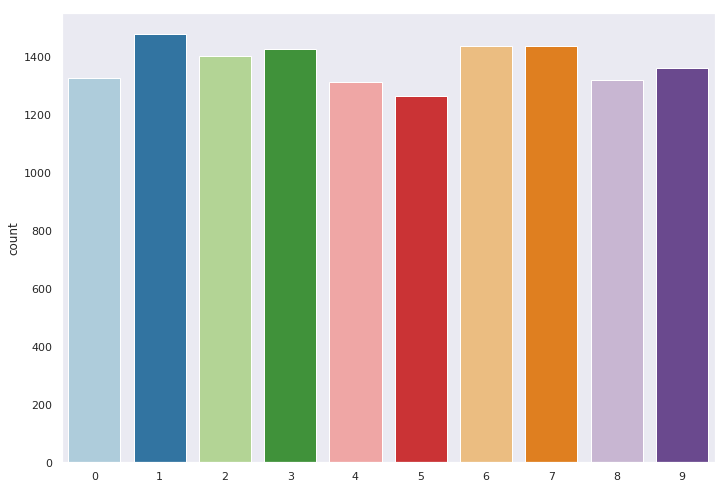

In [105]:
sns.countplot(Ytrain.values)
plt.show()